## ASSIGNMENT-2

**Team Name**: Team Prestige

**IDs**: 2022702005,2022900038,2022701017

**Name**: Amitabh Sharma, Saksham Gupta, Priyansh Sinha

### Instructions
 * Fill in the team name, id and names of all the teams members in the cell above.
 * Code must be written in Python in Jupyter Notebooks. We highly recommend using anaconda distribution or at the minimum, virtual environments for this assignment.
 * All the code and result files should be uploaded in the github classroom.
 * You can use the in-built methods and **unless explicitly mentioned**, don't need to code from scratch for this assignment. Make sure your code is modular since you will be reusing them for future assignments.
 * All the representations are expected to be in a right-hand coordinate system. All the functions related to transformation matrices, quaternions, and 3D projection are expected to be coded by you.
 * You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.
 * All the visualization should be done inside the notebook unless specified otherwise.
 * Plagiarism will lead to heavy penalty.
 * Commit this notebook in the GitHub Classroom repo and any other results files under the result folder. 
 * Commits past the deadline will not be considered.
 * Extensions will be granted using the extension policy only, so please go through the policy carefully and reach out to the TAs beforehand.

In [2]:
# List the imports here
import numpy as np
import matplotlib.pyplot as plt
import time
import open3d as o3d
import math

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### SECTION 1: Non-Linear least squares optimization for Gaussian function

#### 1.1 Levenberg Marquardt

Implement the Levenberg Marquardt algorithm from scratch using numpy to solve for the parameters of a gaussian distribution.

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

##### Problem to solve

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value ($\|r\|^2$) vs the number of iterations
* The Ground Truth data values and the predicted data values.

Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.

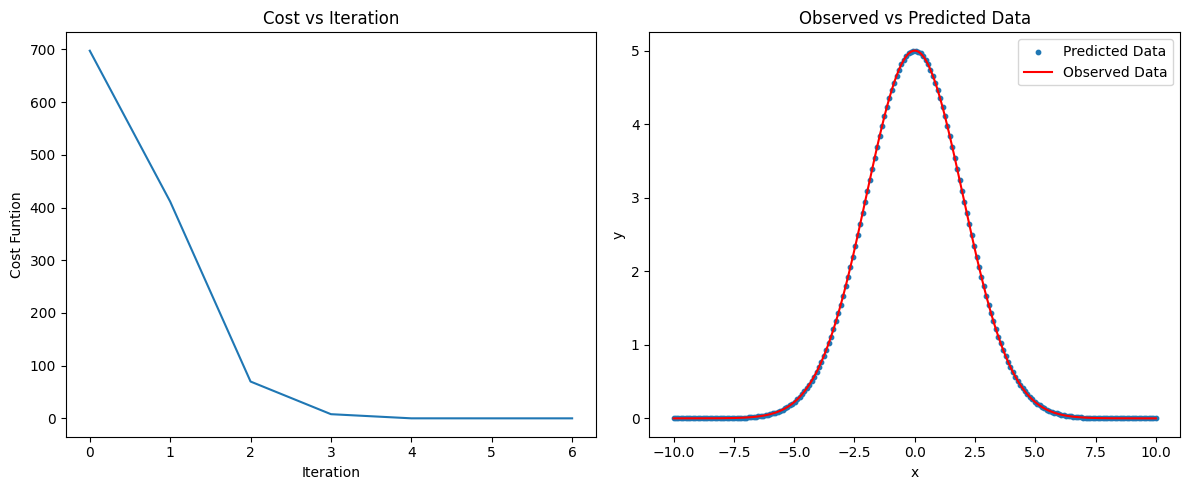

In [39]:
##############################################################################
# TODO: Do tasks described in 1.1 (a)
##############################################################################

def gauss(x,a,m,s):
    return a*np.exp(-((x-m)**2)/(2*s**2))

xobs = np.linspace(-10,10,200)
a,m,s = 5,0,2
y_true = gauss(xobs,a,m,s)
a_init,m_init,s_init = 1,1,1
y_pred = gauss(xobs,a_init,m_init,s_init)

lr= 0.01
n_iter= 10
tolerance= 1e-6

def lm(xobs,y_true,a,m,s,lr,n_iter,tolerance):
    cost_history=[]
    for i in range(n_iter):
        y_pred = gauss(xobs,a,m,s)
        residual = y_pred-y_true
        cost = np.sum(residual**2)
        cost_history.append(cost)
        J = np.zeros((xobs.size, 3))
        J[:, 0] = np.exp(-((xobs - m)**2) / (2 * s**2))
        J[:, 1] = a * (xobs - m) * np.exp(-((xobs - m)**2) / (2 *  s**2)) / s**2
        J[:, 2] = a * ((xobs - m)**2) * np.exp(-((xobs - m)**2) / (2 * s**2)) / s**3

        delta_x = (-J.T@residual)@np.linalg.inv((J.T@J)+(lr*np.eye(3)))
        a = a + delta_x[0]
        m = m + delta_x[1]
        s = s + delta_x[2]
        
        if  np.linalg.norm(delta_x) < tolerance:
            break
    return a,m,s,cost_history

a_new,m_new,s_new,cost_new = lm(xobs,y_true,a_init,m_init,s_init,lr,n_iter,tolerance)
y_pred_new = gauss(xobs,a_new,m_new,s_new)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Cost vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost Funtion')
plt.plot(range(len(cost_new)),cost_new)

plt.subplot(1, 2, 2)
plt.title('Observed vs Predicted Data')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xobs, y_pred_new, label='Predicted Data', s=10)
plt.plot(xobs,y_true,'r', label='Observed Data')
plt.legend()

plt.tight_layout()
plt.show()

##############################################################################
# END OF YOUR CODE
##############################################################################

#### Observations after testing 

Hyperparamaters - Learning Rate, No of Iterations 

The best values for hyperparameters to reach an accuracy(tolerance) of 1^e-6 are : Learning rate = 0.01 and No of iterations = 10. 

Justification: After plotting the graphs for various combinations of the hyperparameters, we found that these values lead to convergence with just 10 iterations.

| Learning Rate | No of Iterations | Cost after completion |
| --- | --- | --- |
| 0.01 | 5 | 0.028898515269233295 |
| 0.01 | 10 | 3.738480559051125e-14 |
| 0.01 | 15 | 3.738480559051125e-14 |
| 0.01 | 20 | 3.738480559051125e-14 |

In the above table we can see that convergence is reached within 10 iterations

| Learning Rate | No of Iterations | Cost after completion |
| --- | --- | --- |
| 0.1 | 5 | 0.025037475438983808 |
| 0.1 | 10 | 1.8509550808499418e-11 |
| 0.1 | 15 | 1.8509550808499418e-11 |
| 0.1 | 20 | 1.8509550808499418e-11 |

In the above table we can see that convergence is reached within 10 iterations

| Learning Rate | No of Iterations | Cost after completion |
| --- | --- | --- |
| 1 | 5 | 0.00862546774750003 |
| 1 | 10 | 1.1810943212045367e-13 |
| 1 | 15 | 1.1810943212045367e-13 |
| 1 | 20 | 1.1810943212045367e-13 |

In the above table we can see that convergence is reached within 10 iterations

| Learning Rate | No of Iterations | Cost after completion |
| --- | --- | --- |
| 10 | 5 | 0.19422153924040236 |
| 10 | 10 | 1.8404737536479022e-06 |
| 10 | 15 | 1.776364032756626e-11 |
| 10 | 20 | 1.776364032756626e-11 |

In the above table we can see that convergence is reached within 15 iterations

### SECTION 2: ICP

#### 2.1 Perform Procrustes alignmenton two point clouds with (given) known correspondences. 

Let X be your point cloud observed from the initial pose P1. You then transform it to a new pose P2. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). 

Use toothless.ply point cloud and perform the alignment between the two point clouds using procrustes alignment. Your task is to write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them. Compute the alignment error after aligning the two point clouds.

**Use *root mean squared error (RSME)* as the alignment error metric.**

Make sure your code is modular as we will use this function in the next sub-part.

In [70]:
#To generate downsampled and rotated pointclouds

def rotation_matrix(alpha, beta, gamma):
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(alpha), -np.sin(alpha)],
                   [0, np.sin(alpha), np.cos(alpha)]])
    
    Ry = np.array([[np.cos(beta), 0, np.sin(beta)],
                   [0, 1, 0],
                   [-np.sin(beta), 0, np.cos(beta)]])
    
    Rz = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                   [np.sin(gamma), np.cos(gamma), 0],
                   [0, 0, 1]])
    
    return Rz.dot(Ry.dot(Rx))

pcd = o3d.io.read_point_cloud("./data/toothless.ply")
pcd1 = pcd.voxel_down_sample(voxel_size = 4)
rotation_matrix_result = rotation_matrix(np.radians(-90), np.radians(0), np.radians(0))
pcd1.points = o3d.utility.Vector3dVector(np.dot(np.asarray(pcd1.points),rotation_matrix_result))
o3d.visualization.draw_geometries([pcd1])
o3d.io.write_point_cloud(f'./data/og_toothless.pcd', pcd1)

pcd = o3d.io.read_point_cloud("./data/og_toothless.pcd")
rotation_matrix_result = rotation_matrix(np.radians(0), np.radians(0), np.radians(45))
pcd1.points = o3d.utility.Vector3dVector(np.dot(np.asarray(pcd1.points),rotation_matrix_result))
pcd1.translate((100,0,0))
o3d.visualization.draw_geometries([pcd1])
o3d.io.write_point_cloud(f'./data/rotated_toothless.pcd', pcd1)

True

In [3]:
##############################################################################
# TODO: Do tasks described in 2.1
##############################################################################

def procrustes(a, b):
    a0 = a.mean(axis=0)
    b0 = b.mean(axis=0)
    ao = a - a0
    bo = b - b0
    H = np.dot(ao.T,bo)
    U,D,V_t = np.linalg.svd(H)
    R = np.dot(V_t.T,U.T)
    t = a0 - np.dot(R,b0)
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = t
    return T

def rmse(a,b):
    return np.sqrt(np.sum(np.square(np.subtract(a,b)),axis=0)/a.shape[0])

pcd1 = o3d.io.read_point_cloud("./data/og_toothless.pcd")
pcd2 = o3d.io.read_point_cloud("./data/rotated_toothless.pcd")

o3d.visualization.draw_geometries([pcd1,pcd2])
a = np.asarray(pcd1.points)
b = np.asarray(pcd2.points)
a0 = a.mean(axis=0)
b0 = b.mean(axis=0)
a = a - a0
b = b - b0
pcd1.points = o3d.utility.Vector3dVector(a)
pcd2.points = o3d.utility.Vector3dVector(b)
a = np.asarray(pcd1.points)
b = np.asarray(pcd2.points)
T = procrustes(a ,b)
print('Calculated Transformation Matrix:\n\n',T)
temp = np.ones((b.shape[0],1))
points = np.append(b,temp,axis=1)
pcd2.points = o3d.utility.Vector3dVector(np.dot(np.asarray(pcd2.points),T[:3,:3]))
pcd2.translate(T[:3,3])
o3d.visualization.draw_geometries([pcd1,pcd2])
a = np.asarray(pcd1.points)
b = np.asarray(pcd2.points)
c =  rmse(a,b)
print("\nRMSE Alignment error:",c)


##############################################################################
# END OF YOUR CODE
##############################################################################

Calculated Transformation Matrix:

 [[ 7.07106781e-01  7.07106781e-01 -4.20174265e-11  2.05196932e-13]
 [-7.07106781e-01  7.07106781e-01  1.41756240e-11  3.94423993e-13]
 [ 3.97344760e-11  1.96871195e-11  1.00000000e+00  7.24249095e-24]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

RMSE Alignment error: [3.01282627e-06 3.20868915e-06 2.91302536e-09]


#### 2.2 Implement ICP algorithm with unknown correspondences.

Your task is to write a function that implements ICP and takes two point clouds as input wherein the correspondances are unknown. Visualize the pointclouds and plot their individual coordinate frames as you perform ICP over them. Compute the alignment error in each iteration.

In [21]:
def find_correspondences(P,Q):
    omega = []
    for i in range(len(P)):
        p = P[i]
        min_distance = math.inf;
#         print(math.inf)
        q_index = -1
        
        dist = Q - p
        distance = np.linalg.norm(dist,axis=1)
        q_index = np.argmin(distance)
        
        omega.append([i,q_index])
#         print(omega[i])
    return omega

In [22]:
def covariance(omega, P, Q):
    omega = np.array(omega)
#     print(np.shape(omega))
#     print(np.shape(P))
    #weight = np.linalg.norm(P - Q[omega[:,1]],axis=1)
    H = np.dot(P.T, Q[omega[:,1]])
    return H

In [31]:
pcd2 = o3d.io.read_point_cloud("./data/og_toothless.pcd")
pcd1 = o3d.io.read_point_cloud("./data/rotated_toothless.pcd")
vis = o3d.visualization.Visualizer()
vis.create_window()  
vis.add_geometry(pcd1)
vis.add_geometry(pcd2)
cost_history=[]

for i in range(100):
    a = np.asarray(pcd1.points)
    b = np.asarray(pcd2.points)
    a0 = a.mean(axis=0)
    b0 = b.mean(axis=0)
    ao = a - a0;
    bo = b - b0;
    omega = find_correspondences(ao,bo)
    cov = covariance(omega, ao, bo)
    U,D,V_t = np.linalg.svd(cov)
    R = np.dot(V_t.T,U.T)
    t = b0.T - np.dot(R,a0.T)
    m = b.shape[1]
    T = np.identity(m+1)
    T[:m, :m] = R
    T[:m, m] = t
    pcd1 = pcd1.transform(T)
    cost_history.append(rmse(np.asarray(pcd1.points),np.asarray(pcd2.points)))
    vis.update_geometry(pcd1)
    vis.update_geometry(pcd2)  
    vis.poll_events()
    vis.update_renderer() 
    time.sleep(0.1)
o3d.visualization.draw_geometries([pcd1,pcd2])

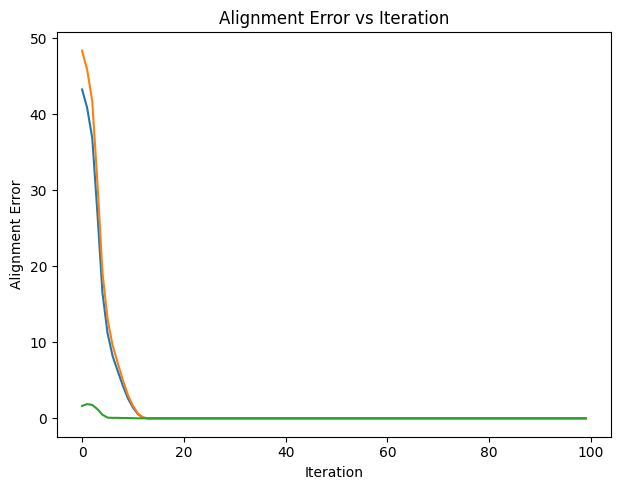

Alignment Error after 100 iterations is: [3.01282627e-06 3.20868922e-06 2.91304261e-09]


In [32]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Alignment Error vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Alignment Error')
plt.plot(range(len(cost_history)),cost_history)
plt.tight_layout()
plt.show()

# vis.destroy_window() 
#o3d.visualization.draw_geometries([pcd1,pcd2])    
print(f"Alignment Error after {100} iterations is:",cost_history[-1])